In [1]:
import sys
import importlib
import datetime

import numpy as np
import pandas as pd
import xarray as xr
import pvlib as pv
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.colorbar as colorbar
import scipy.ndimage.filters as filters

In [2]:
sys.path.append('/home/travis/python_code/letkf_forecasting/')
import letkf_forecasting as lf
import prepare_sat_data as prep
import random_functions as rf
import get_wrf_data as gwd

In [3]:
%matplotlib inline

In [4]:
year=2014
month = 5
day = 6
solar_noon = pd.Timestamp('12:30:00')
solar_noon = solar_noon.replace(year=year, month=month, day=day)
print(solar_noon)
step = pd.Timedelta('3h')
start = solar_noon - step
start = (start - pd.Timedelta('30min')).round(freq='1h')
end = solar_noon + step
end = (end + pd.Timedelta('30min')).round(freq='1h')
time_range = pd.date_range(start, end, freq='1h')
print(time_range)

2014-05-06 12:30:00
DatetimeIndex(['2014-05-06 09:00:00', '2014-05-06 10:00:00',
               '2014-05-06 11:00:00', '2014-05-06 12:00:00',
               '2014-05-06 13:00:00', '2014-05-06 14:00:00',
               '2014-05-06 15:00:00', '2014-05-06 16:00:00'],
              dtype='datetime64[ns]', freq='H')


In [5]:
wrf_path = '/a2/uaren/{year}/{month:02}/{day:02}/solar_3/wrfsolar_d02_hourly.nc'
wrf_path = wrf_path.format(year=year, month=month, day=day)
print(wrf_path)
save_path = './data/'
print(save_path)

/a2/uaren/2014/05/06/solar_3/wrfsolar_d02_hourly.nc
./data/


In [7]:
importlib.reload(gwd)
gwd.main(time_range=time_range, wrf_path=wrf_path, save_path=save_path)

./data/for_5_6/raw_winds/


In [11]:
suffix = '_' + str(month) + '_' + str(day)
file = save_path + 'for' + suffix + '/raw_winds/' + '{var}'
U = pd.read_hdf(file.format(var='U.h5'))                                                                     
V = pd.read_hdf(file.format(var='V.h5'))                                                                                                                  
wind_lats = np.load(file.format(var='wind_lats.npy'))                                                                                                                 
wind_lons = np.load(file.format(var='wind_lons.npy'))                                                                                                                 
U_shape = np.load(file.format(var='U_shape.npy'))                                                                                                                   
V_shape = np.load(file.format(var='V_shape.npy'))

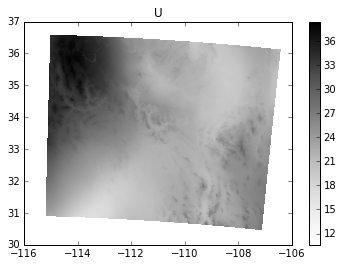

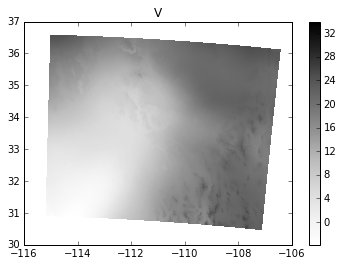

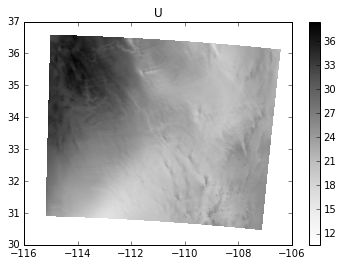

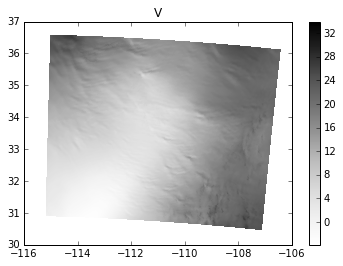

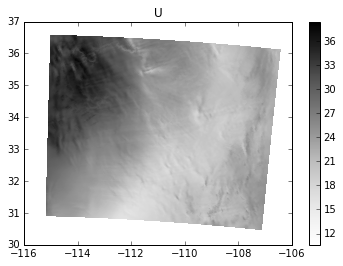

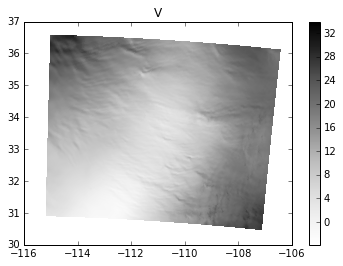

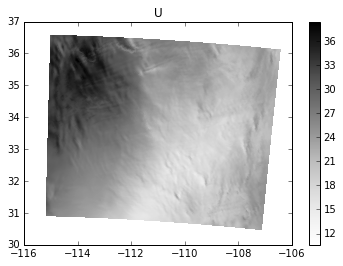

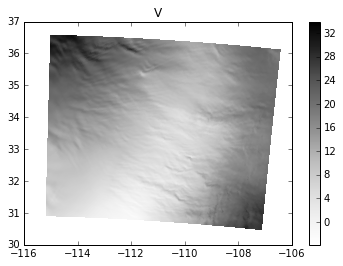

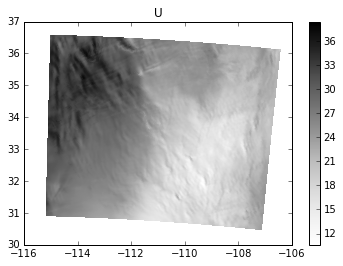

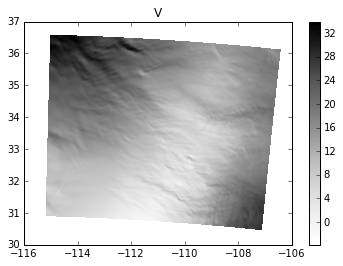

In [12]:
for t in range(5):
    vmin = U.values.min()
    vmax = U.values.max()
    plt.figure()
    im = plt.pcolormesh(
        wind_lons.reshape(U_shape[0], V_shape[1]),
        wind_lats.reshape(U_shape[0], V_shape[1]),
        U.iloc[t].values.reshape(U_shape)[:, 1:],
        cmap='Greys', vmin=vmin, vmax=vmax)
    plt.colorbar(im)
    plt.title('U')
    
    vmin = V.values.min()
    vmax = V.values.max()
    plt.figure()
    im = plt.pcolormesh(
        wind_lons.reshape(U_shape[0], V_shape[1]),
        wind_lats.reshape(U_shape[0], V_shape[1]),
        V.iloc[t].values.reshape(V_shape)[1:, :],
        cmap='Greys', vmin=vmin, vmax=vmax)
    plt.colorbar(im)
    plt.title('V')